# Examples of masks

In [1]:
from diffractio import sp, plt, np
from diffractio import nm, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields

## Standard masks

### Two_levels

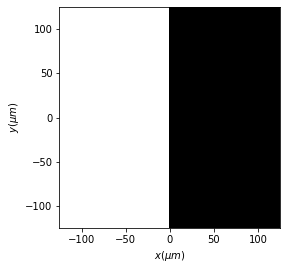

In [2]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.two_levels(level1=1, level2=0, x_edge=0)
t1.draw(kind='intensity')


### Edge Series

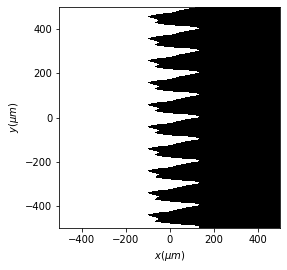

In [3]:
num_pixels = 512
length = 1000 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.06238 * um

a_coef = np.array([[0, 1, 2], [0, 100, 25]])
b_coef = np.array([[0, 3], [0, 25]])

t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.edge_series(r0=(0, 0),
               period=100,
               a_coef=a_coef,
               b_coef=b_coef,
               angle=0 * degrees,
               invert=False)
t2.draw()


### slit

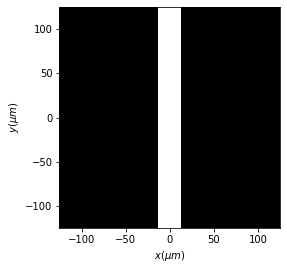

In [4]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.slit(x0=0, size=25 * um, angle=0 * degrees)
t1.draw(kind='intensity')


### sinusoidal slit

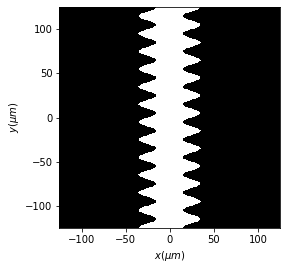

In [5]:
x = np.linspace(-125 * um, 125 * um, 512)
y = np.linspace(-125 * um, 125 * um, 512)
wavelength = 1 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.sinusoidal_slit(x0=0 * um,
                   size=50 * um,
                   amplitude=10 * um,
                   phase=0 * degrees,
                   angle=0 * degrees,
                   period=20 * um)
t1.draw(kind='intensity')


### slit_series

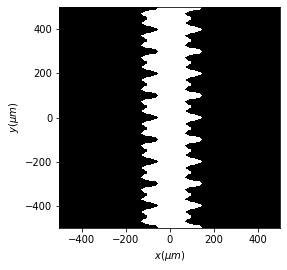

In [6]:
num_data = 256
length = 1000 * um
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

a_coef1 = np.array([[0, 1, 2], [0, 25, 25]])
a_coef2 = np.array([[0, 1, 2], [0, 25, 25]])

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.slit_series(x0=0,
               width=200,
               period1=100,
               period2=100,
               Dy=(0, 0),
               a_coef1=a_coef1,
               a_coef2=a_coef2,
               angle=0 * degrees)

t1.draw()


### double_slit

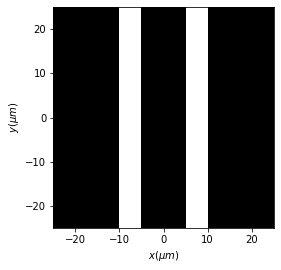

In [7]:
num_data = 512
length = 50 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.double_slit(x0=0, size=5 * um, separation=15 * um, angle=0 * degrees)
t1.draw(kind='intensity')


### triangle

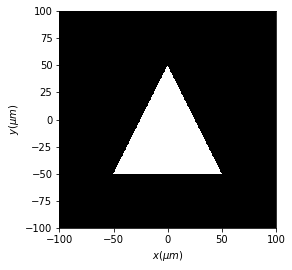

In [8]:
x = np.linspace(-100 * um, 100 * um, 512)
y = np.linspace(-100 * um, 100 * um, 512)
wavelength = 1 * um
t1 = Scalar_mask_XY(x, y, wavelength)

t1.triangle(r0=(0, 50 * um), slope=2, height=100 * um, angle=0 * degrees)
t1.draw(kind='intensity')


### square

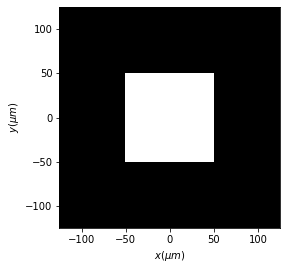

In [9]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(0 * um, 0 * um), size=100*um, angle=0 * degrees)
t1.draw(kind='intensity')


With this function we can also generate rectangles

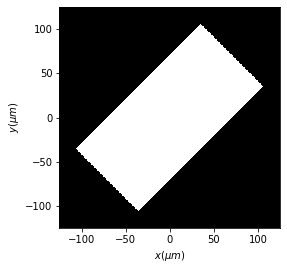

In [10]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(r0=(0 * um, 0 * um), size=(200 * um, 100 * um), angle=45 * degrees)
t1.draw(kind='intensity')

### polygon

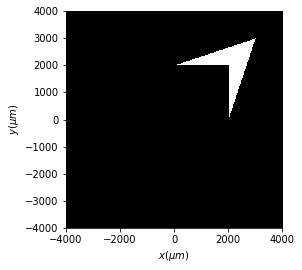

In [11]:
x0 = np.linspace(-4 * mm, 4 * mm, 512)
y0 = np.linspace(-4 * mm, 4 * mm, 512)
wavelength = 0.6328 * um

vertices = np.array([(2 * mm, 2 * mm), (2 * mm, 0 * mm), (3 * mm, 3 * mm),
                     (0 * mm, 2 * mm)])

t = Scalar_mask_XY(x0, y0, wavelength)

t.polygon(vertices)
t.draw()

### regular polygon

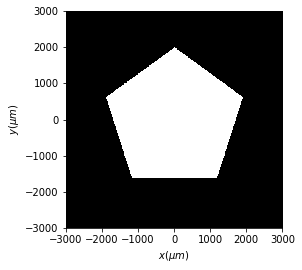

In [12]:
x0 = np.linspace(-3 * mm, 3 * mm, 512)
y0 = np.linspace(-3 * mm, 3 * mm, 512)
wavelength = 0.6328 * um

t = Scalar_mask_XY(x0, y0, wavelength)
vertices = t.regular_polygon(num_vertices = 5, radius = 2 * mm, angle = 0 * degrees)
t.draw()

### star

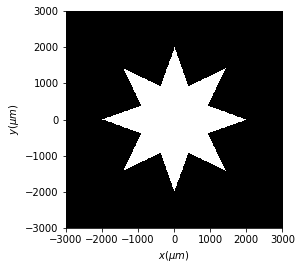

In [13]:
x0 = np.linspace(-3 * mm, 3 * mm, 512)
y0 = np.linspace(-3 * mm, 3 * mm, 512)
wavelength = 0.6328 * um



t = Scalar_mask_XY(x0, y0, wavelength)
vertices = t.star(num_peaks = 8, radii = (2 * mm, 1*mm), angle = 0 * degrees)
t.draw()

### circle

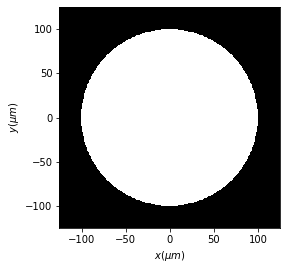

In [14]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=100*um)
t1.draw(kind='intensity')


With this function we can also generate ellipses

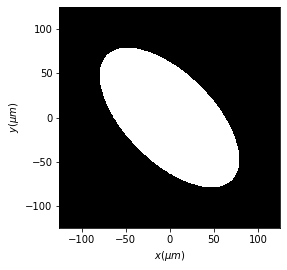

In [15]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(50 * um, 100 * um), angle=45*degrees)
t1.draw(kind='intensity')

and also angular sectors.

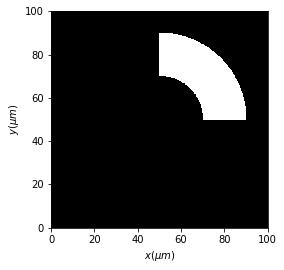

In [16]:
r0 = (50*um, 50*um)
radii = (20*um, 40 *um)
angles = (0 * degrees, 90 * degrees)
size = 100*um
xin = np.linspace(0, size, 1024*2)
yin = np.linspace(0, size, 1024*2)
wavelength = 0.6328*um


t = Scalar_mask_XY(x=xin, y=yin, wavelength=wavelength)

t.circular_sector(r0=r0, radii=radii, angles=angles)
t.draw()

### super_gauss

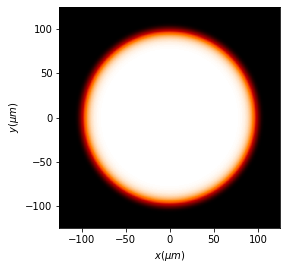

In [17]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.super_gauss(r0=(0 * um, 0 * um), radius=100 * um, power=22)
t1.draw(kind='intensity')


### square_circle

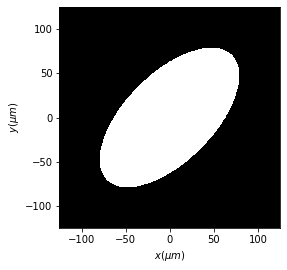

In [18]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(100 * um, 50 * um), angle=45 * degrees)
t1.draw(kind='intensity')


### angular_aperture 

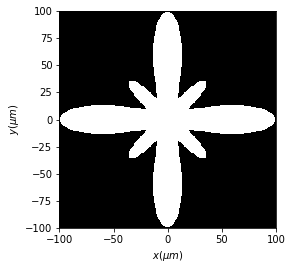

In [19]:
num_pixels = 256
length = 200 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um

t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
a_coef = np.array([[0, 4, 8], [50, 25, 25]])
t2.angular_aperture(a_coef=a_coef, angle=0 * degrees)
t2.draw()


### ring

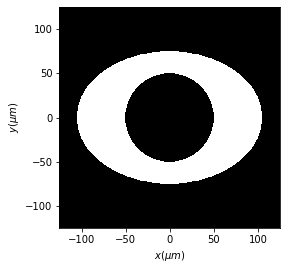

In [20]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.ring(r0=(0 * um, 0 * um),
        radius1=(50 * um, 50 * um),
        radius2=(75 * um, 105 * um),
        angle=90 * degrees)
t1.draw(kind='intensity')


### rings

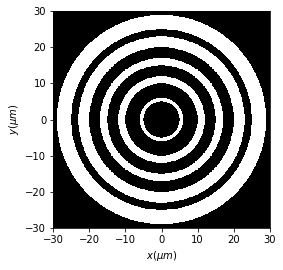

In [21]:
num_data = 512
length = 60 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

inner_radius = np.array([5., 10, 15, 20, 25])

outer_radius = np.array([6., 12, 17, 23, 29])

t1 = Scalar_mask_XY(x, y, wavelength)
t1.rings(r0=(0, 0), inner_radius=inner_radius, outer_radius=outer_radius)
t1.pupil()
t1.draw(kind='intensity')


### cross

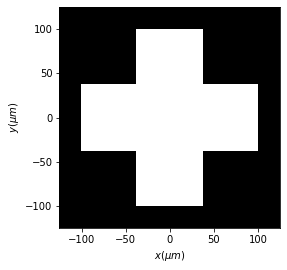

In [22]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.cross(r0=(0 * um, 0 * um), size=(200 * um, 75 * um), angle=0 * degrees)
t1.draw(kind='intensity')


### image

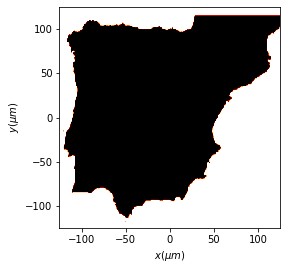

In [23]:
num_data = 1204
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.image(filename="spain.png",
         normalize=True,
         canal=0,
         lengthImage=True,
         angle=0 * degrees)

t1.draw(kind='intensity')


### gray_scale

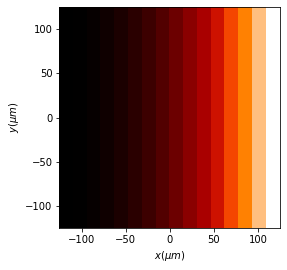

In [24]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.gray_scale(num_levels=16, level_min=0, level_max=1)
t1.draw(kind='intensity')


### hiperellipse

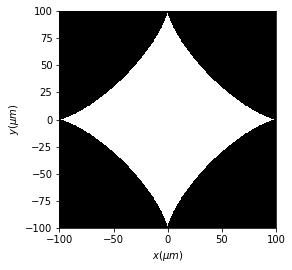

In [25]:
x = np.linspace(-100 * um, 100 * um, 512)
y = np.linspace(-100 * um, 100 * um, 512)
wavelength = 1 * um

t1 = Scalar_mask_XY(x, y, wavelength)

t1.super_ellipse(r0=(0, 0),
                 radius=(100 * um, 100 * um),
                 angle=0 * degrees,
                 n=[0.75, 0.75])
t1.draw(kind='intensity')


### superformula

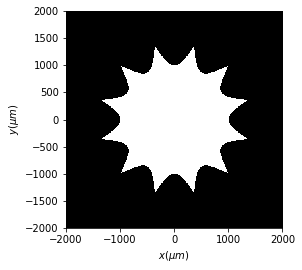

In [26]:
x = np.linspace(-2 * mm, 2 * mm, 512)
y = np.linspace(-2 * mm, 2 * mm, 512)
wavelength = 1 * um

t = Scalar_mask_XY(x, y, wavelength)
t.superformula(r0=(0, 0), radius=(1 * mm, 1 * mm), n=(160, 160, 160), m=12)
t.draw()

### lens

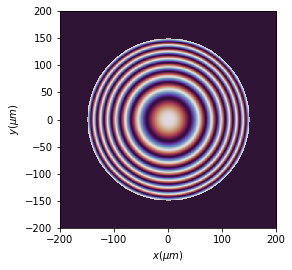

In [27]:
num_data = 512
length = 400 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t0 = Scalar_mask_XY(x, y, wavelength)
t0.lens(r0=(0 * um, 0 * um),
        radius=(150 * um, 150 * um),
        focal=(2.5 * mm, 2.5 * mm),
        angle=0 * degrees)
t0.draw(kind='phase')


### Cylindrical lens

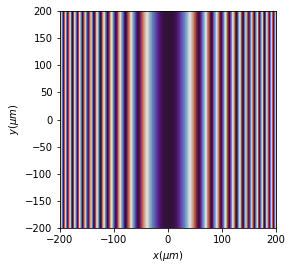

In [28]:
num_data = 512
length = 400 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t0 = Scalar_mask_XY(x, y, wavelength)
t0.lens_cylindrical(x0=0 * um, focal=2.5 * mm, angle=0 * degrees)
t0.draw(kind='phase')

### Fresnel lens

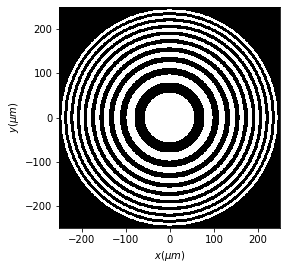

In [29]:
# Amplitude lens
num_data = 512
length = 500 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.fresnel_lens(r0=(0 * um, 0 * um),
                radius=(250 * um, 250 * um),
                focal=(5 * mm, 5 * mm),
                angle=45 * degrees,
                kind='amplitude',
                phase=np.pi)
t1.draw(kind='intensity')


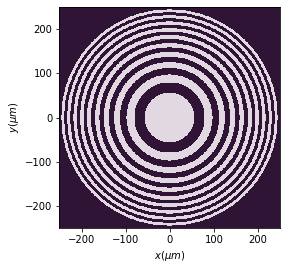

In [30]:
# Phase lens
num_data = 512
length = 500 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1.fresnel_lens(r0=(0 * um, 0 * um),
                radius=(250 * um, 250 * um),
                focal=(5 * mm, 5 * mm),
                angle=0 * degrees,
                kind='phase',
                phase=np.pi)
t1.draw(kind='phase')


### biprism_fresnel

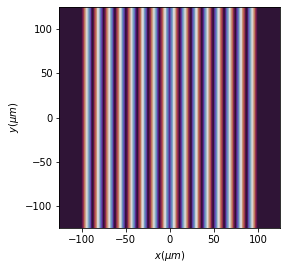

In [31]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.biprism_fresnel(r0=(0 * um, 0 * um), width=100 * um, height=5 * um, n=1.5)
t1.draw(kind='phase')


### axicon

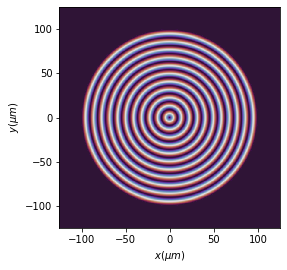

In [32]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.axicon(r0=(0 * um, 0 * um),
          radius=100 * um,
          angle=2 * degrees,
          refractive_index=1.5,
          off_axis_angle=0,
          reflective=True)
t1.draw(kind='phase')


### grating_forked

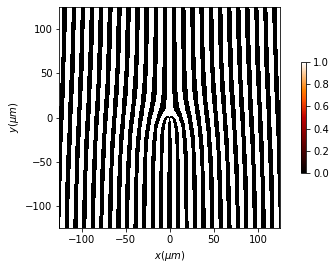

In [33]:
num_data = 1024
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t = Scalar_mask_XY(x, y, wavelength)
t.forked_grating(r0=(0 * um, 0 * um),
                 period=10 * um,
                 l=3,
                 alpha=2,
                 kind='amplitude',
                 angle=0 * degrees)
t.draw(has_colorbar='vertical')


### roughness

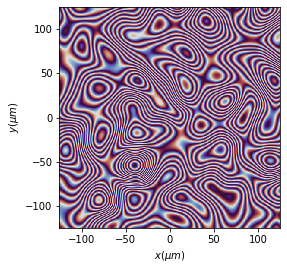

In [34]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.roughness(t=(25 * um, 25 * um), s=1 * um)
t1.draw(kind='phase')


### Sine grating

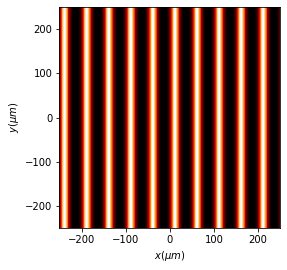

In [35]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 50 * um
red = Scalar_mask_XY(x, y, wavelength)
red.sine_grating(period=period,
                 amp_min=0,
                 amp_max=1,
                 x0=0 * um,
                 angle=0 * degrees)
red.draw(kind='intensity')


### Ronchi grating

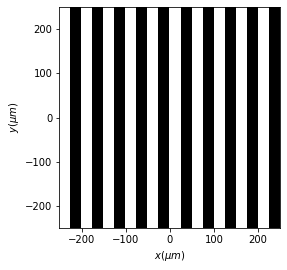

In [36]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_XY(x, y, wavelength)
red.ronchi_grating(period=50 * um,
                   x0=0 * um,
                   angle=0 * degrees,
                   fill_factor=0.5)
red.draw(kind='intensity')


### Binary grating (amplitude + phase)

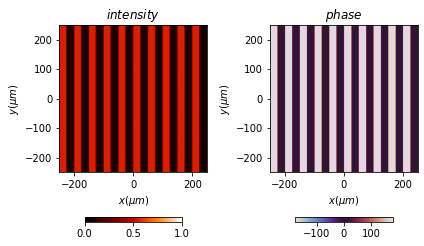

In [37]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_XY(x, y, wavelength)
red.binary_grating(period=50 * um,
                   a_min=.25,
                   a_max=.75,
                   phase=np.pi,
                   x0=0,
                   fill_factor=0.5,
                   angle=0 * degrees)
red.draw(kind='field')


### Blazed grating

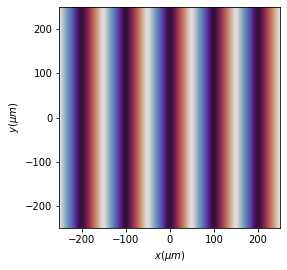

In [38]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 100 * um
red = Scalar_mask_XY(x, y, wavelength)
red.blazed_grating(period=period,
                   phase_max=2*np.pi,
                   x0=0,
                   angle=0 * degrees)
red.draw(kind='phase')


### 2D grating

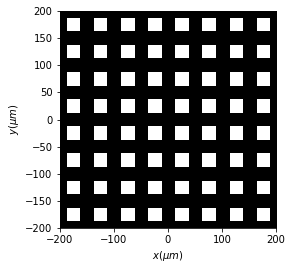

In [39]:
x = np.linspace(-200 * um, 200 * um, 512)
y = np.linspace(-200 * um, 200 * um, 512)
wavelength = 0.6238 * um
period = 50 * um
red = Scalar_mask_XY(x, y, wavelength)
red.grating_2D(r0=(0,0),
               period=period,
               a_min=0,
               a_max=1.,
               phase=0 * np.pi / 2,
               fill_factor=0.5,
               angle=0 * degrees)
red.draw(kind='intensity')


### Chess grating

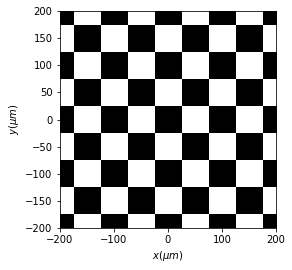

In [40]:
x = np.linspace(-200 * um, 200 * um, 512)
y = np.linspace(-200 * um, 200 * um, 512)
wavelength = 0.6238 * um
period = 100 * um
red = Scalar_mask_XY(x, y, wavelength)
red.grating_2D_chess(r0=(period / 8, period / 4),
                     period=period,
                     a_min=0,
                     a_max=1.,
                     phase=0 * np.pi / 2,
                     fill_factor=0.5,
                     angle=(0 * degrees))
red.draw(kind='intensity')


### Angular grating

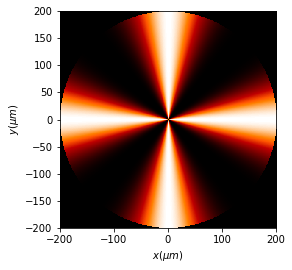

In [41]:
x = np.linspace(-200 * um, 200 * um, 512)
y = np.linspace(-200 * um, 200 * um, 512)
wavelength = 0.6238 * um
period = 50 * um
red = Scalar_mask_XY(x, y, wavelength)
red.angular_grating(r0=(0,0), num_petals=4,  radius= 200*um, phase=0*degrees, is_binary=False)
red.draw(kind='intensity')


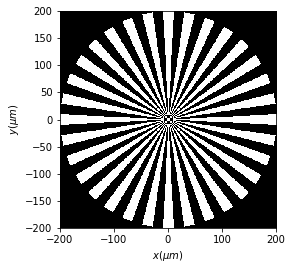

In [42]:
x = np.linspace(-200 * um, 200 * um, 512)
y = np.linspace(-200 * um, 200 * um, 512)
wavelength = 0.6238 * um
period = 50 * um
red = Scalar_mask_XY(x, y, wavelength)
red.angular_grating(r0=(0, 0), num_petals=32, radius=200 * um, phase=0, is_binary=True)
red.draw(kind='intensity')


### random circle edge

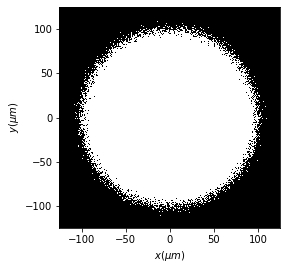

In [43]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6238 * um

t = Scalar_mask_XY(x, y, wavelength)
t.circle_rough(r0=(0, 0), radius=100 * um, angle=0 * degrees, sigma=4 * um)
t.draw(kind='intensity')


### Random ring edge

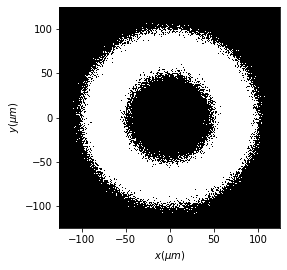

In [44]:
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)

wavelength = 0.6238 * um

t = Scalar_mask_XY(x, y, wavelength)
t.ring_rough(r0=(0, 0),
             radius1=50 * um,
             radius2=100 * um,
             angle=0 * degrees,
             sigma=4 * um)
t.draw(kind='intensity')
